## 6	EXTRAER Y CALCULAR INDICADORES FINANCIEROS CLAVES CON PYTHON 

## 6.2	Conseguir datos e indicadores financieros claves con Python

In [2]:
import requests 
import pandas as pd

import requests

demo= 'api key' #Reemplace por su api key personal. Obtener en https://fmpcloud.io/

companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=100&apikey={demo}')
companies = companies.json()

technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])
print(technological_companies)


['AAPL', 'MSFT', 'MSF.BR', 'TSM', 'NVDA', 'ADBE', 'ASML', 'ORCL', 'ASML.AS', 'SHOP.TO', 'CRM', 'CIS.BR', 'CSCO', 'INTC', 'INCO.BR', 'AVGO', 'ACN', 'SHOP', 'TXN', 'SAP', 'QCOM', 'INTU', 'IBM', 'SONY', 'AMAT', 'NOW', 'AMD', 'SQ']


In [3]:
metrics = {}
for item in technological_companies:
    try:
      metrics[item] = {}
      keymetrics = requests.get(f'https://fmpcloud.io/api/v3/ratios/{item}?apikey={demo}')
      keymetrics = keymetrics.json()
      keymetrics[0]

      metrics[item]['date'] = keymetrics[0]['date']
      metrics[item]['currentratio'] = float(keymetrics[0]['currentRatio'])

      metrics[item]['debtToAssets'] = float(keymetrics[0]['debtRatio'])
      metrics[item]['debtToEquity'] = float(keymetrics[0]['debtEquityRatio'])
      metrics[item]['dividendYield'] = float(keymetrics[0]['dividendYield'])

      metrics[item]['interestCoverage'] = float(keymetrics[0]['interestCoverage'])

      metrics[item]['Gross_Profit_Margin'] = float(keymetrics[0]['grossProfitMargin'])

      metrics[item]['roe'] = float(keymetrics[0]['returnOnEquity'])

      metrics[item]['priceToSalesRatio'] = float(keymetrics[0]['priceSalesRatio'])
      metrics[item]['price_to_book_Ratio']  = float(keymetrics[0]['priceToBookRatio'])
      metrics[item]['priceEarningsRatio']  = float(keymetrics[0]['priceEarningsRatio'])
      metrics[item]['return_on_assets']  = float(keymetrics[0]['returnOnAssets'])
    except:
      pass

print(metrics)


{'AAPL': {'date': '2020-09-26', 'currentratio': 1.3636044481554577, 'debtToAssets': 0.7982666847799239, 'debtToEquity': 3.957039440456695, 'dividendYield': 0.007053332328502797, 'interestCoverage': 23.07274625826662, 'Gross_Profit_Margin': 0.38233247727810865, 'roe': 0.8786635853012749, 'priceToSalesRatio': 7.272321523437178, 'price_to_book_Ratio': 30.553901085207258, 'priceEarningsRatio': 34.773150493918536, 'return_on_assets': 0.1772557180259843}, 'MSFT': {'date': '2020-06-30', 'currentratio': 2.5157654542940118, 'debtToAssets': 0.6073691302342098, 'debtToEquity': 1.5469214903976196, 'dividendYield': 0.009755239611687882, 'interestCoverage': 20.439598610575068, 'Gross_Profit_Margin': 0.6778100199279796, 'roe': 0.37429841763592103, 'priceToSalesRatio': 10.849763691500891, 'price_to_book_Ratio': 13.116031193704353, 'priceEarningsRatio': 35.041642111515095, 'return_on_assets': 0.14696111326835065}, 'MSF.BR': {}, 'TSM': {}, 'NVDA': {'date': '2021-01-31', 'currentratio': 4.090445859872611

## 6.3	Consolidar indicadores financieros en un DataFrame de Pandas

In [4]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df = metrics_df.T
metrics_df


AAPL        MSFT        NVDA        ADBE  \
date                 2020-09-26  2020-06-30  2021-01-31  2020-11-27   
currentratio           1.363604    2.515765    4.090446    1.477866   
debtToAssets           0.798267    0.607369    0.413254    0.453797   
debtToEquity           3.957039    1.546921    0.704315     0.83082   
dividendYield          0.007053    0.009755    0.001194         NaN   
interestCoverage      23.072746   20.439599   24.630435         NaN   
Gross_Profit_Margin    0.382332     0.67781    0.623448         NaN   
roe                    0.878664    0.374298    0.256438         NaN   
priceToSalesRatio      7.272322   10.849764   19.842054         NaN   
price_to_book_Ratio   30.553901   13.116031   19.585997         NaN   
priceEarningsRatio     34.77315   35.041642   76.377251         NaN   
return_on_assets       0.177256    0.146961    0.150464         NaN   

                           ASML        ORCL     ASML.AS     SHOP.TO  \
date                 2020-12-31  2021-05-31  2020-12-31  2020-12-31   
currentratio           2.412357    2.299578    2.412357   15.690746   
debtToAssets           0.491503         0.0    0.491503    0.175473   
debtToEquity           0.966579         0.0    0.966579    0.212817   
dividendYield          0.005615     0.01294    0.005767         NaN   
interestCoverage      93.352535    6.094952   93.352535         NaN   
Gross_Profit_Margin    0.486261         0.0    0.486261         NaN   
roe                      0.2563    0.104846      0.2563         NaN   
priceToSalesRatio     13.586812    5.847759   13.228928         NaN   
price_to_book_Ratio   13.697639    1.805483   13.336836         NaN   
priceEarningsRatio    53.443805   17.220387   52.036065         NaN   
return_on_assets       0.130328    0.104846    0.130328         NaN   

                           CSCO        INTC        AVGO        SHOP  \
date                 2020-07-25  2020-12-26  2020-10-31  2020-12-31   
currentratio           1.720145    1.908742    1.867054   15.690746   
debtToAssets           0.600224    0.470655    0.685236    0.175473   
debtToEquity           1.501398    0.889126     2.17698    0.212817   
dividendYield           0.03367    0.024532     0.03428         NaN   
interestCoverage      23.282051   37.958665    2.370287         NaN   
Gross_Profit_Margin    0.642644    0.560083    0.565807         NaN   
roe                    0.295728    0.257891    0.123844         NaN   
priceToSalesRatio      3.624155    2.914859    6.758002         NaN   
price_to_book_Ratio     4.71188    2.800802    6.754326         NaN   
priceEarningsRatio    15.933162   10.860393   54.538904         NaN   
return_on_assets       0.118225    0.136514    0.038982         NaN   

                            TXN         SAP        INTU        SONY  \
date                 2020-12-31  2020-12-31  2020-07-31  2021-03-31   
currentratio             4.2841    1.173415    2.261264    0.923654   
debtToAssets           0.525244    0.488165    0.532888      0.7867   
debtToEquity           1.106346    0.960528    1.140815    3.718429   
dividendYield          0.022451    0.014553     0.00621     0.00454   
interestCoverage      32.189474    9.499283  155.428571   79.429298   
Gross_Profit_Margin    0.640965    0.711574     0.82055    0.270886   
roe                    0.609013    0.173133    0.357618    0.210152   
priceToSalesRatio     10.552555    4.685068   11.763863    1.499977   
price_to_book_Ratio   16.610481    4.310004   17.691873    2.420951   
priceEarningsRatio     27.27444   24.894145   49.471361   11.519975   
return_on_assets       0.289132    0.087991    0.167048    0.044462   

                           AMAT         AMD          SQ  
date                 2020-10-25  2020-12-26  2020-12-31  
currentratio           2.998206     2.54158    1.881104  
debtToAssets           0.526775    0.348694    0.728299  
debtToEquity           1.113159    0.535378    2.680513  
dividendYield           0.01004         N

## 6.4	Calcular indicadores financieros con Python

In [5]:
import requests 
import pandas as pd
import requests

demo= 'api key' #Reemplace por su api key personal

#pass sector and marketcap as arguments to limit the results
companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=100&apikey={demo}')
companies = companies.json()

technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])
print(technological_companies)


['AAPL', 'MSFT', 'MSF.BR', 'TSM', 'NVDA', 'ADBE', 'ASML', 'ORCL', 'ASML.AS', 'SHOP.TO', 'CRM', 'CIS.BR', 'CSCO', 'INTC', 'INCO.BR', 'AVGO', 'ACN', 'SHOP', 'TXN', 'SAP', 'QCOM', 'INTU', 'IBM', 'SONY', 'AMAT', 'NOW', 'AMD', 'SQ']


In [6]:
metrics= {}

for item in technological_companies:
  try:
    balancesheet = requests.get(f'https://fmpcloud.io/api/v3/balance-sheet-statement/{item}?&apikey={demo}').json()
    incomestatemnt = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{item}?&apikey={demo}').json()
    marketcap = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{item}?apikey={demo}').json()
    marketcap = marketcap[0]['marketCap']
    companydata = requests.get(f'https://fmpcloud.io/api/v3/profile/{item}?apikey={demo}').json()
    latest_Annual_Dividend = companydata[0]['lastDiv']
    price = companydata[0]['price']


    balancesheet[0]
    current_ratio = balancesheet[0]['totalCurrentAssets'] / balancesheet[0]['totalCurrentLiabilities']
    debt_to_assets = balancesheet[0]['totalDebt'] / balancesheet[0]['totalAssets']
    debt_to_equity = balancesheet[0]['totalDebt'] / balancesheet[0]['totalStockholdersEquity']
    dividend_yield = latest_Annual_Dividend / price
    interest_coverage = incomestatemnt[0]['operatingIncome'] / incomestatemnt[0]['interestExpense']
    gross_profit_margin = (incomestatemnt[0]['revenue'] - incomestatemnt[0]['costOfRevenue'])/incomestatemnt[0]['revenue']
    #index one in below because we want to have equity at the beginning of the period. *4 if we want to annualize it is quarter revenue
    ROE = (incomestatemnt[0]['netIncome'] / ((balancesheet[0]['totalStockholdersEquity']+ balancesheet[1]['totalStockholdersEquity'])/2))
    price_to_sales = marketcap / (incomestatemnt[0]['revenue'])
    price_to_earnings = marketcap / (incomestatemnt[0]['netIncome']) 
    price_to_book = marketcap / balancesheet[0]['totalStockholdersEquity']
    ROA = (incomestatemnt[0]['netIncome']/balancesheet[0]['totalAssets'])

    metrics[item] = {}
    metrics[item]['ROA'] = ROA

    metrics[item]['ROE'] = ROE
    metrics[item]['Current Ratio'] = current_ratio
    metrics[item]['Debt to Assets'] = debt_to_assets
    metrics[item]['Debt to Equity'] = debt_to_equity
    metrics[item]['Dividend Yield'] = (dividend_yield*100)
    metrics[item]['Interest Coverage'] = interest_coverage
    metrics[item]['Gross Profit Margin'] = gross_profit_margin
    metrics[item]['Price to Sales'] = price_to_sales
    metrics[item]['Price to Earnings'] = price_to_earnings
    metrics[item]['Price to Book'] = price_to_book
  except:
    pass

print(metrics)


{'AAPL': {'ROA': 0.1772557180259843, 'ROE': 0.7368556155223421, 'Current Ratio': 1.3636044481554577, 'Debt to Assets': 0.34714469199229364, 'Debt to Equity': 1.720809929750991, 'Dividend Yield': 0.5754255392460891, 'Interest Coverage': 23.07274625826662, 'Gross Profit Margin': 0.38233247727810865, 'Price to Sales': 8.9488369388558, 'Price to Earnings': 42.78953462350421, 'Price to Book': 37.59760590566125}, 'TSM': {'ROA': 0.1875912802989996, 'ROE': 0.29906504662242067, 'Current Ratio': 1.769721223903682, 'Debt to Assets': 0.1248343888375395, 'Debt to Equity': 0.18632193606792197, 'Dividend Yield': 1.4666000331785005, 'Interest Coverage': 272.3016822367046, 'Gross Profit Margin': 0.5309959037921246, 'Price to Sales': 0.4668573638727328, 'Price to Earnings': 1.2072812600136176, 'Price to Book': 0.33802658332068847}, 'ADBE': {'ROA': 0.2166035249547027, 'ROE': 0.44212538751638797, 'Current Ratio': 1.477866473149492, 'Debt to Assets': 0.33907099324658213, 'Debt to Equity': 0.620778045838359

In [7]:
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df = metrics_df.T
metrics_df['mean'] = metrics_df.mean(axis=1)

metrics_df


AAPL         TSM       ADBE       ASML       ORCL  \
ROA                   0.177256    0.187591   0.216604   0.130328   0.104846   
ROE                   0.736856    0.299065   0.442125   0.268634   0.192009   
Current Ratio         1.363604    1.769721   1.477866   2.412357   2.299578   
Debt to Assets        0.347145    0.124834   0.339071   0.171568   0.062926   
Debt to Equity        1.720810    0.186322   0.620778   0.337401   0.062926   
Dividend Yield        0.575426    1.466600   0.000000   0.203946   1.549681   
Interest Coverage    23.072746  272.301682  36.525862  93.352535   6.094952   
Gross Profit Margin   0.382332    0.530996   0.866180   0.486261   1.000000   
Price to Sales        8.948837    0.466857  22.595936  20.564974   6.736093   
Price to Earnings    42.789535    1.207281  55.278422  80.892447  19.836339   
Price to Book        37.597606    0.338027  21.921328  20.732722   2.079754   

                          CSCO        SHOP        TXN       SONY       AMAT  \
ROA                   0.118225    0.041158   0.289132   0.044462   0.161902   
ROE                   0.313718    0.067862   0.618437   0.241575   0.385164   
Current Ratio         1.720145   15.690746   4.284100   0.923654   2.998206   
Debt to Assets        0.153743    0.117597   0.351300   0.079411   0.270568   
Debt to Equity        0.384573    0.142624   0.739959   0.375345   0.571753   
Dividend Yield        2.716785    0.000000   2.081253   0.223053   0.667161   
Interest Coverage    23.282051    9.923280  32.189474  79.429298  18.187500   
Gross Profit Margin   0.642644    0.526207   0.640965   0.270886   0.447157   
Price to Sales        4.619584   64.644999  12.302223   0.014005   7.269637   
Price to Earnings    20.309445  592.712391  31.796685   0.107560  34.554380   
Price to Book         6.006069   29.586805  19.364586   0.022604  11.821923   

                           AMD          SQ        mean  
ROA                   0.277840    0.021592    0.147578  
ROE                   0.574792    0.096940    0.353098  
Current Ratio         2.541580    1.881104    3.280222  
Debt to Assets        0.036822    0.309134    0.197010  
Debt to Equity        0.056536    1.137773    0.528067  
Dividend Yield        0.000000    0.000000    0.790325  
Interest Coverage    29.127660   -0.330418   51.929718  
Gross Profit Margin   0.445252    0.287801    0.543890  
Price to Sales       11.461426   12.768758   14.366111  
Price to Earnings    44.938916  569.072885  124.458024  
Price to Book        19.170447   45.224373   17.822187

## 6.5	Graficar indicadores financieros con Python

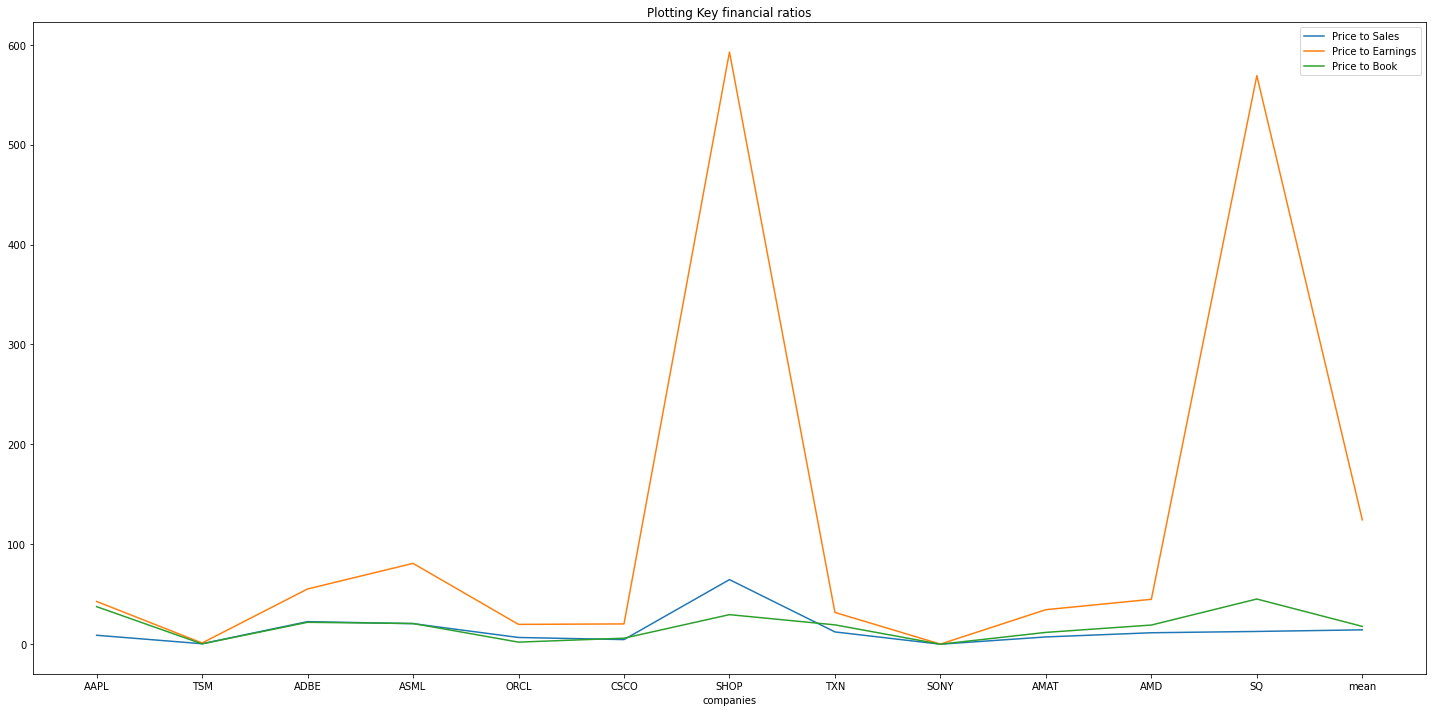

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
x1 = metrics_df.columns
#in the 8 row we have Price To Sales data
y1 = metrics_df.iloc[8,]
plt.plot(x1, y1, label = "Price to Sales")

# line 2 points
x2 = metrics_df.columns
#in the 9 row we have Price To Earnings data:
y2 = metrics_df.iloc[9,]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Price to Earnings")

# line 3 points
x3 = metrics_df.columns
#in the 10 row we have Price To Book data:
y3 = metrics_df.iloc[10,]
# plotting the line 2 points 
plt.plot(x3, y3, label = "Price to Book")

plt.xlabel('companies')
# Set the y axis label of the current axis.
plt.ylabel('')
# Set a title of the current axes.
plt.title('Plotting Key financial ratios')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.tight_layout()
plt.show()


In [9]:
metrics_filter = metrics_df.T
metrics_filter[(metrics_filter['ROE'] > 0.2) & (metrics_filter['Current Ratio']> 1.09)]


ROA       ROE  Current Ratio  Debt to Assets  Debt to Equity  \
AAPL  0.177256  0.736856       1.363604        0.347145        1.720810   
TSM   0.187591  0.299065       1.769721        0.124834        0.186322   
ADBE  0.216604  0.442125       1.477866        0.339071        0.620778   
ASML  0.130328  0.268634       2.412357        0.171568        0.337401   
CSCO  0.118225  0.313718       1.720145        0.153743        0.384573   
TXN   0.289132  0.618437       4.284100        0.351300        0.739959   
AMAT  0.161902  0.385164       2.998206        0.270568        0.571753   
AMD   0.277840  0.574792       2.541580        0.036822        0.056536   
mean  0.147578  0.353098       3.280222        0.197010        0.528067   

      Dividend Yield  Interest Coverage  Gross Profit Margin  Price to Sales  \
AAPL        0.575426          23.072746             0.382332        8.948837   
TSM         1.466600         272.301682             0.530996        0.466857   
ADBE        0.000000          36.525862             0.866180       22.595936   
ASML        0.203946          93.352535             0.486261       20.564974   
CSCO        2.716785          23.282051             0.642644        4.619584   
TXN         2.081253          32.189474             0.640965       12.302223   
AMAT        0.667161          18.187500             0.447157        7.269637   
AMD         0.000000          29.127660             0.445252       11.461426   
mean        0.790325          51.929718             0.543890       14.366111   

      Price to Earnings  Price to Book  
AAPL          42.789535      37.597606  
TSM            1.207281       0.338027  
ADBE          55.278422      21.921328  
ASML          80.892447      20.732722  
CSCO          20.309445       6.006069  
TXN           31.796685      19.364586  
AMAT          34.554380      11.821923  
AMD           44.938916      19.170447  
mean         124.458024      17.822187

## 6.6	Exportar indicadores financieros a un archivo en Excel

In [10]:
import requests
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

#Pasar el ticket de la empresa
company = 'AAPL'

api = 'api key' #Reemplace por su api key personal

# Solicite datos financieros de la API y cargue en variables

IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={api}').json()
BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={api}').json()
CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?apikey={api}').json()

Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{company}?apikey={api}').json()
key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?apikey={api}').json()

profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{company}?apikey={api}').json()

millions = 1000000

# Cree un diccionario vacío y agréguele las cifras financieras
financials = {}

dates = [2020,2019,2018,2017,2016]


In [23]:
for item in range(5):
  #print(dates[item])
    financials[dates[item]] ={}


#Indicadores claves

    financials[dates[item]]['Mkt Cap'] = key_Metrics[item]['marketCap'] /millions
    financials[dates[item]]['Debt to Equity'] = key_Metrics[item]['debtToEquity']
    financials[dates[item]]['Debt to Assets'] = key_Metrics[item]['debtToAssets']
    financials[dates[item]]['Revenue per Share'] = key_Metrics[item]['revenuePerShare']
    financials[dates[item]]['NI per Share'] = key_Metrics[item]['netIncomePerShare']



    financials[dates[item]]['Revenue'] = IS[item]['revenue'] / millions
    financials[dates[item]]['Gross Profit'] = IS[item]['grossProfit'] / millions
    financials[dates[item]]['R&D Expenses'] = IS[item]['researchAndDevelopmentExpenses']/ millions
    financials[dates[item]]['Op Expenses'] = IS[item]['operatingExpenses'] / millions
    financials[dates[item]]['Op Income'] = IS[item]['operatingIncome'] / millions
    financials[dates[item]]['Net Income'] = IS[item]['netIncome'] / millions

    financials[dates[item]]['Cash'] = BS[item]['cashAndCashEquivalents'] / millions
    financials[dates[item]]['Inventory'] = BS[item]['inventory'] / millions
    financials[dates[item]]['Cur Assets'] = BS[item]['totalCurrentAssets'] / millions
    financials[dates[item]]['LT Assets'] = BS[item]['totalNonCurrentAssets'] / millions
    financials[dates[item]]['Int Assets'] = BS[item]['intangibleAssets'] / millions
    financials[dates[item]]['Total Assets'] = BS[item]['totalAssets'] / millions

    financials[dates[item]]['Cur Liab'] = BS[item]['totalCurrentLiabilities'] / millions
    financials[dates[item]]['LT Debt'] = BS[item]['longTermDebt'] / millions
    financials[dates[item]]['LT Liab'] = BS[item]['totalNonCurrentLiabilities'] / millions
    financials[dates[item]]['Total Liab'] = BS[item]['totalLiabilities'] / millions
    financials[dates[item]]['SH Equity'] = BS[item]['totalStockholdersEquity'] / millions

    financials[dates[item]]['CF Operations'] = CF[item]['netCashProvidedByOperatingActivities'] / millions
    financials[dates[item]]['CF Investing'] = CF[item]['netCashUsedForInvestingActivites'] / millions
    financials[dates[item]]['CF Financing'] = CF[item]['netCashUsedProvidedByFinancingActivities'] / millions
    financials[dates[item]]['CAPEX'] = CF[item]['capitalExpenditure'] / millions
    financials[dates[item]]['FCF'] = CF[item]['freeCashFlow'] / millions
    financials[dates[item]]['Dividends Paid'] = CF[item]['dividendsPaid'] / millions
    
    
    #Indicadores del estado de resultados

    financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
    financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
    financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
    financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']


#Indicadores del estado de situación financiera

    financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
    financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
    financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
    financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']

#Indicadores de rentabilidad

    financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
    financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
    financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']


  #Indicadores de precio
    
    financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
    financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
    financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
    financials[dates[item]]['Price To FCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
    financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
    financials[dates[item]]['EPS'] = IS[item]['eps']
    financials[dates[item]]['EPS'] = IS[item]['eps']

#Transforma el diccionario en un DataFrame de pandas

    fundamentals = pd.DataFrame.from_dict(financials,orient='columns')

    fundamentals['CAGR'] = (fundamentals[2020]/fundamentals[2016])**(1/5) - 1
    fundamentals['2020 growth'] = (fundamentals[2020] - fundamentals[2019] )/ fundamentals[2019] 
    fundamentals['2019 growth'] = (fundamentals[2019] - fundamentals[2018] )/ fundamentals[2018] 
    fundamentals['2018 growth'] = (fundamentals[2018] - fundamentals[2017] )/ fundamentals[2017] 
    fundamentals['2017 growth'] = (fundamentals[2017] - fundamentals[2016] )/ fundamentals[2016]

#Exportar a Excel

fundamentals.to_excel('fundamentals.xlsx')

print(fundamentals)


                               2020         2019         2018       2017  \
Mkt Cap                1,996,361.34 1,150,071.58 1,051,729.23 869,818.59   
Debt to Equity                 1.51         1.01         0.87       0.73   
Debt to Assets                 0.80         0.73         0.71       0.64   
Revenue per Share             15.82        14.09        13.40      10.98   
NI per Share                   3.31         2.99         3.00       2.32   
Revenue                  274,515.00   260,174.00   265,595.00 229,234.00   
Gross Profit             104,956.00    98,392.00   101,839.00  88,186.00   
R&D Expenses              18,752.00    16,217.00    14,236.00  11,581.00   
Op Expenses               38,668.00    34,462.00    30,941.00  26,842.00   
Op Income                 66,288.00    63,930.00    70,898.00  61,344.00   
Net Income                57,411.00    55,256.00    59,531.00  48,351.00   
Cash                      38,016.00    48,844.00    25,913.00  20,289.00   
Inventory   